In [19]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')  # hide warnings 

import sys
sys.path.append("../")

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import particles.mcmc as mcmc
import particles.state_space_models as ssm
import particles.distributions as dists
from particles.core import SMC
from particles import smc_samplers as ssp
import seaborn
from tqdm import tqdm
import pickle
import os

from Utils import *

We now use the three steps Adaptative method proposed by Knape & De Valpine (2012). We focus our experiments on the three models detailed in the paper: Random Walk (M3), Exponential growth (M2) and Logistic Diffusion with Euler Discretization (M1).

In [20]:
n_particles = 4000
n_iter = 30000
m1, m2, update_interv = 4000, 20000, 1000

## Random Walk model

In [3]:
prior_RW = {'tau': dists.Uniform(a=0.,b=10.),'sigma': dists.Uniform(a=0.,b=10.)}
p_RW = dists.StructDist(prior_RW)
load_model = True

if load_model:
    new_pmmh_RW = pickle.load(
        open(
            os.path.join(
                os.getcwd(),
                "../../Data/Definitive results/Knape Adaptive method/RW_model_Adapt.pkl"
            ),
            "rb"
        )
    )
else:
    new_pmmh_RW= AdaptivePMMH(ssm_cls=RandomWalk2D, prior=p_RW, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                          m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.,
                             verbose=100)
    new_pmmh_RW.run()
    pickle.dump(
        new_pmmh_RW,
        open(
            os.path.join(
                os.getcwd(),
                "../../Data/RW_model_Adapt.pkl"
            ),
            "wb"
        )
    )

mean square jump distance: 412.0032710950125
posterior loglikelihood: [-538.84251422 -538.84251422 -538.84251422 -538.84251422 -540.04985404]
Acceptance rate: 0.30808616172323444
Last terms of theta chain: [(0.52762782, 0.06192152) (0.52762782, 0.06192152)
 (0.45243219, 0.08691041)]


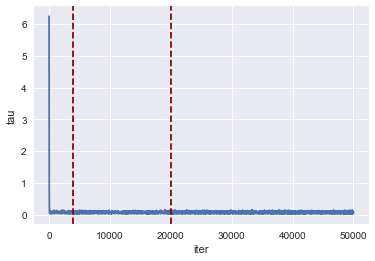

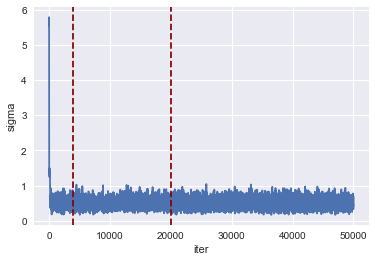

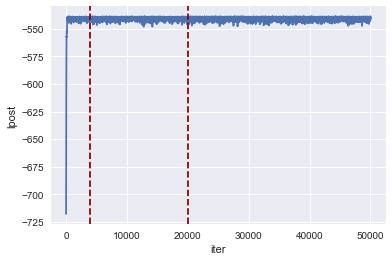

In [4]:
print_metrics(new_pmmh_RW)
plot_theta(prior_RW,new_pmmh_RW, burnin=True, m=[4000,20000])

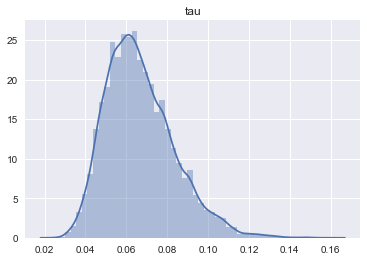

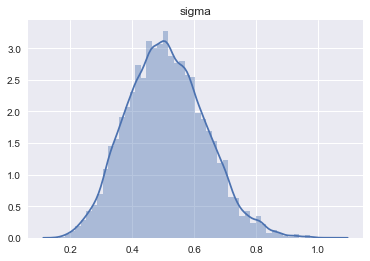

In [5]:
distplot(prior_RW, new_pmmh_RW, 20000)

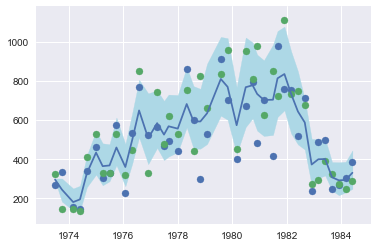

In [6]:
simulRW_new = get_trajectories(N=100, start=20000, model='RW', pmmh=new_pmmh_RW, n_particles=10000)
plot_posterior_trajectories(simulRW_new)

In [7]:
new_pmmh_RW.evidence

-543.655466565785

-540.1215347351587


{'boxes': [<matplotlib.lines.Line2D at 0x1a2262c6a0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a2261b550>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a225f40f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a225f4d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a226273c8>,
  <matplotlib.lines.Line2D at 0x1a22627d30>]}

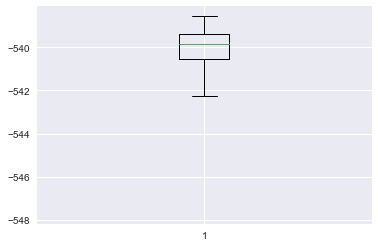

In [8]:
print(new_pmmh_RW.chain.lpost[20000:].mean())
plt.boxplot(new_pmmh_RW.chain.lpost[20000:])

## Exponential Growth (M2)

In [9]:
prior_EG = {'tau': dists.Uniform(a=0.,b=10.),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}

load_model = True

if load_model:
    new_pmmh_EG = pickle.load(
        open(
            os.path.join(
                os.getcwd(),
                "../../Data/Definitive results/Knape Adaptive method/EG_model_Adapt.pkl"
            ),
            "rb"
        )
    )
else:
    p_EG = dists.StructDist(prior_EG)
    new_pmmh_EG= AdaptivePMMH(ssm_cls=LDPDrift, prior=p_EG, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                          m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.,
                             verbose=100)
    new_pmmh_EG.run()
    pickle.dump(
        new_pmmh_EG,
        open(
            os.path.join(
                os.getcwd(),
                "../../Data/EG_model_Adapt.pkl"
            ),
            "wb"
        )
    )

mean square jump distance: 828.6139035069779
posterior loglikelihood: [-542.82164765 -542.82164765 -542.82164765 -542.82164765 -542.82164765]
Acceptance rate: 0.14452289045780917
Last terms of theta chain: [(-0.13747778, 0.56979506, 0.06266357)
 (-0.13747778, 0.56979506, 0.06266357)
 (-0.13747778, 0.56979506, 0.06266357)]


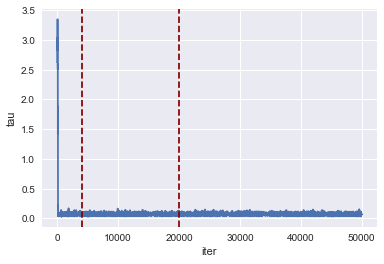

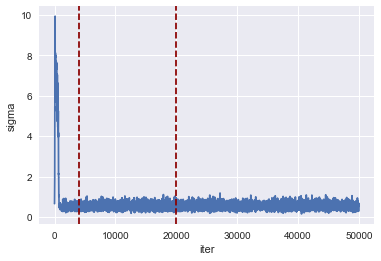

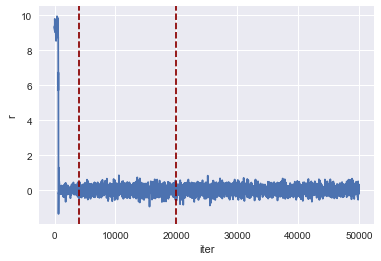

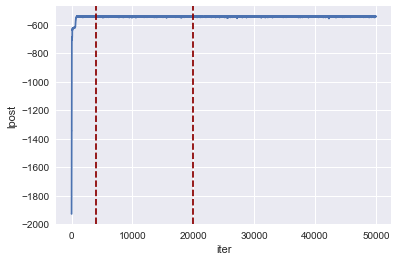

In [10]:
print_metrics(new_pmmh_EG)
plot_theta(prior_EG,new_pmmh_EG, burnin=True, m=[4000,20000])

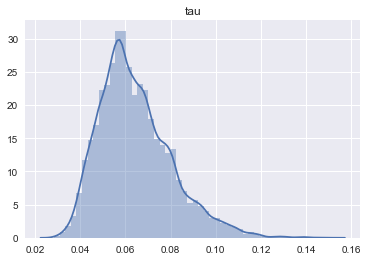

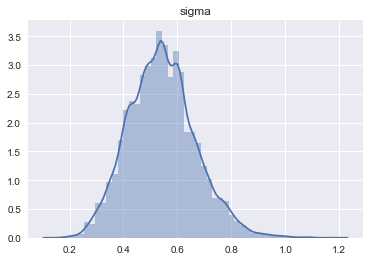

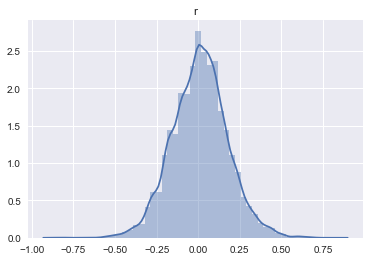

In [11]:
distplot(prior_EG, new_pmmh_EG, 20000)

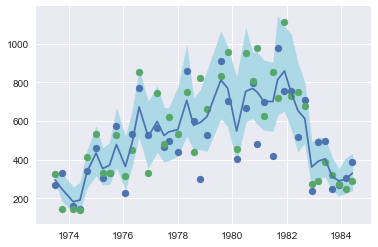

In [12]:
simulEG_new = get_trajectories(N=100, start=20000, model='LDrift', pmmh=new_pmmh_EG, n_particles=10000)
plot_posterior_trajectories(simulEG_new)

In [13]:
new_pmmh_EG.evidence

-547.608362687764

-543.5907384370545


{'boxes': [<matplotlib.lines.Line2D at 0x1a21dc4be0>],
 'caps': [<matplotlib.lines.Line2D at 0x1a216762b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a2165c710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a21dbc630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a21dc43c8>,
  <matplotlib.lines.Line2D at 0x1a21676978>]}

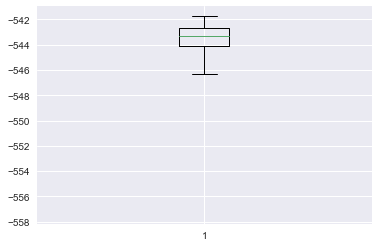

In [14]:
print(new_pmmh_EG.chain.lpost[20000:].mean())
plt.boxplot(new_pmmh_EG.chain.lpost[20000:])

## LDP without Euler Discretization

In [44]:
prior_LD = {'tau': dists.Uniform(a=0.,b=1.), 'b': dists.Uniform(a=0., b=1e-2),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}
load_model = False

if load_model:
    pmmh_LD = pickle.load(
        open(
            os.path.join(
                os.getcwd(),
                "../../Data/Definitive results/Knape Adaptive method/LD_model_Adapt_no_discret.pkl"
            ),
            "rb"
        )
    )
else:
    p_LD = dists.StructDist(prior_LD)
    pmmh_LD= AdaptivePMMH(ssm_cls=LogisticDiffusion2D, prior=p_LD, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                               m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.,
                         verbose=100)
    pmmh_LD.run()
    pickle.dump(
        pmmh_LD,
        open(
            os.path.join(
                os.getcwd(),
                "../../Data/LD_model_Adapt_no_discret.pkl"
            ),
            "wb"
        )
    )

mean square jump distance: 212.34435755498407
posterior loglikelihood: [-537.33668534 -537.33668534 -537.33668534 -537.33668534 -537.33668534]
Acceptance rate: 0.04546818227274242
Last terms of theta chain: [(6.97933014e-05, 0.30887571, 0.60703385, 0.07582067)
 (6.97933014e-05, 0.30887571, 0.60703385, 0.07582067)
 (6.97933014e-05, 0.30887571, 0.60703385, 0.07582067)]


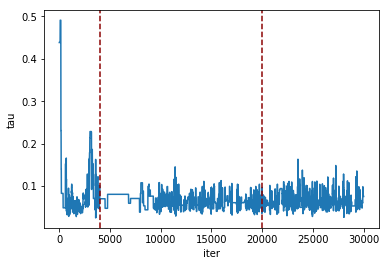

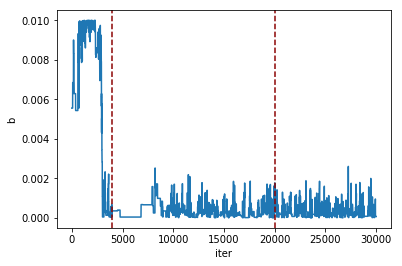

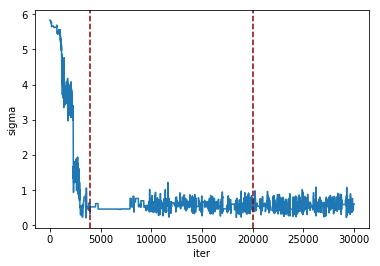

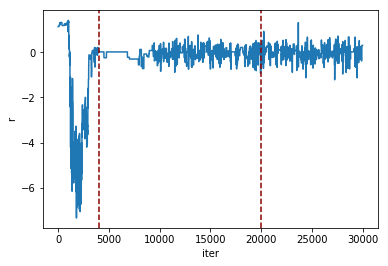

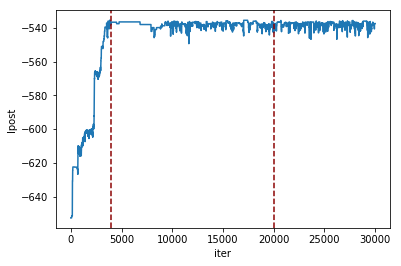

In [8]:
print_metrics(pmmh_LD)
plot_theta(prior_LD,pmmh_LD, burnin=True, m=[4000,20000])

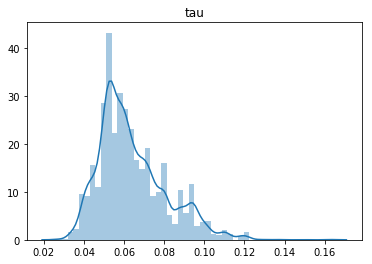

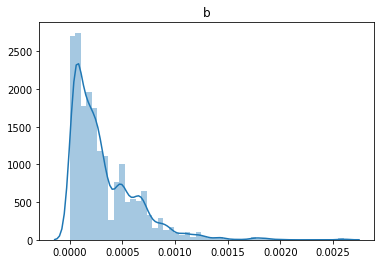

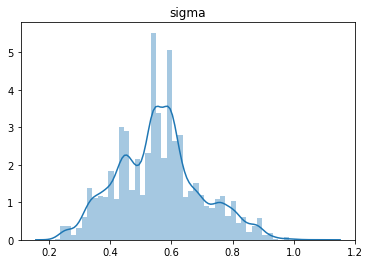

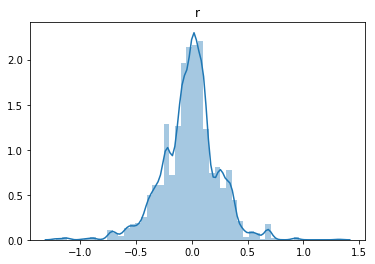

In [9]:
distplot(prior_LD,pmmh_LD, 20000)

In [6]:
simulLD = get_trajectories(N=100, start=20000, model='LD', pmmh=pmmh_LD, n_particles=10000)

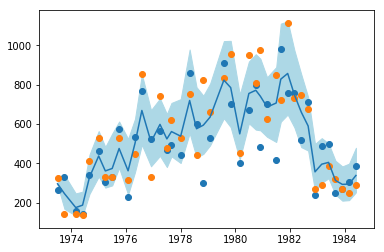

In [7]:
plot_posterior_trajectories(simulLD)

-537.8213964637217


{'whiskers': [<matplotlib.lines.Line2D at 0x299bd2aedd8>,
 'caps': [<matplotlib.lines.Line2D at 0x299bd2aea90>,
 'boxes': [<matplotlib.lines.Line2D at 0x299bd2aefd0>],
 'medians': [<matplotlib.lines.Line2D at 0x299bcfce7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x299bcfcebe0>],
 'means': []}

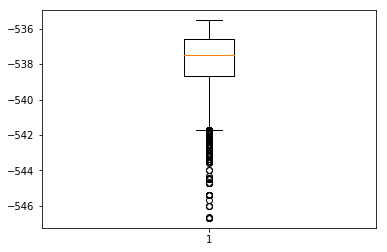

In [45]:
print(pmmh_LD.chain.lpost[20000:].mean())
plt.boxplot(pmmh_LD.chain.lpost[20000:])

## Logistic Diffusion Process with Euler discretization

In [15]:
prior_LDP = {'tau': dists.Uniform(a=0.,b=10), 'b': dists.Uniform(a=0., b=10),
             'sigma': dists.Uniform(a=0.,b=10), 'r':dists.Uniform(a=-10, b=10)}

load_model = True

if load_model:
    new_pmmh_LDP =  pickle.load(
        open(
            os.path.join(
                os.getcwd(),
                "../../Data/Definitive results/Knape Adaptive method/LDP_model_Adapt.pkl"
            ),
            "rb"
        )
    )
else:
    p_LDP = dists.StructDist(prior_LDP)
    new_pmmh_LDP= AdaptivePMMH(ssm_cls=LDEuler, prior=p_LDP, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                              m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=25., k1=5.,
                              verbose=100)
    new_pmmh_LDP.run()
    pickle.dump(
        new_pmmh_LDP,
        open(
            os.path.join(
                os.getcwd(),
                "../../Data/LDP_model_Adapt.pkl"
            ),
            "wb"
        )
    )

mean square jump distance: 31041.650876001004
posterior loglikelihood: [-555.09635984 -555.09635984 -555.09635984 -555.09635984 -555.09635984]
Acceptance rate: 0.09708194163883278
Last terms of theta chain: [(0.99185898, 6.10478871, 0.30612199, 0.05690919)
 (0.99185898, 6.10478871, 0.30612199, 0.05690919)
 (0.99185898, 6.10478871, 0.30612199, 0.05690919)]


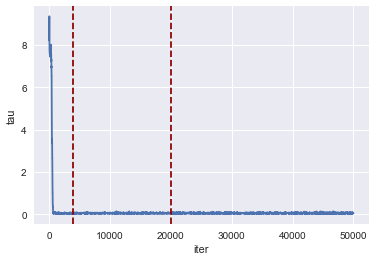

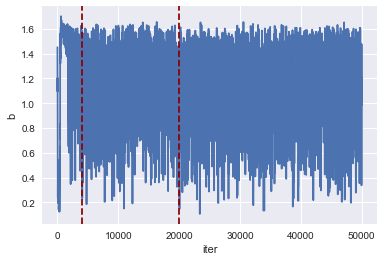

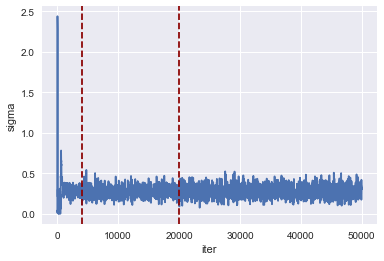

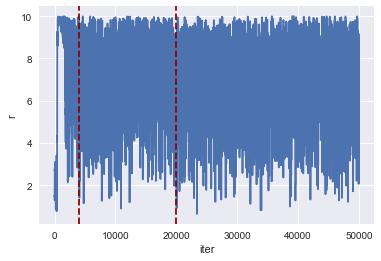

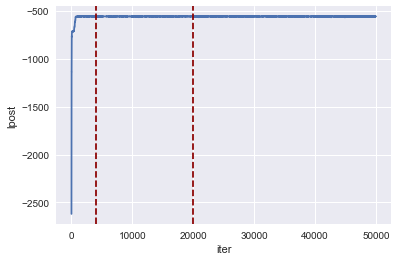

In [16]:
print_metrics(new_pmmh_LDP)
plot_theta(prior_LDP,new_pmmh_LDP, burnin=True, m=[4000,20000])

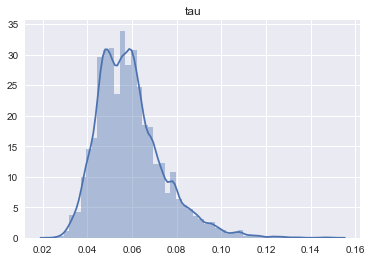

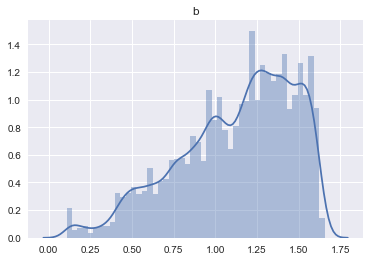

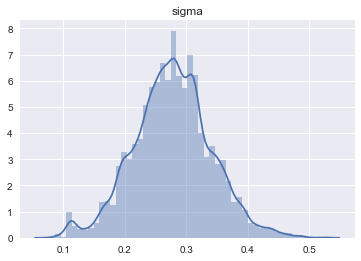

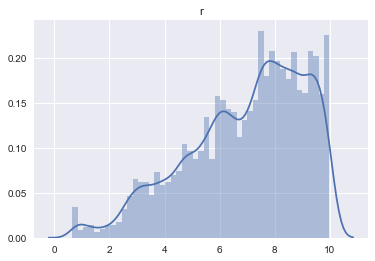

In [17]:
distplot(prior_LDP, new_pmmh_LDP, 20000)

-555.5787095057213


{'boxes': [<matplotlib.lines.Line2D at 0x1a21827198>],
 'caps': [<matplotlib.lines.Line2D at 0x1a1f05f908>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f053be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f053390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a218278d0>,
  <matplotlib.lines.Line2D at 0x1a21827a58>]}

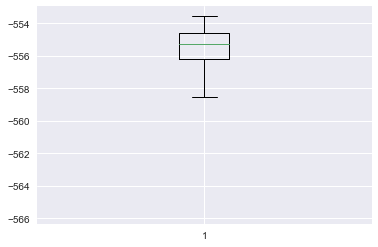

In [18]:
print(new_pmmh_LDP.chain.lpost[4000:].mean())
plt.boxplot(new_pmmh_LDP.chain.lpost[4000:])

# Boxplot marginal likelihood

In [21]:
from joblib import Parallel, delayed
import multiprocessing
      
num_cores = multiprocessing.cpu_count()

In [22]:
prior_RW = {'tau': dists.Uniform(a=0.,b=10.),'sigma': dists.Uniform(a=0.,b=10.)}
p_RW = dists.StructDist(prior_RW)

prior_EG = {'tau': dists.Uniform(a=0.,b=10.),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}
p_EG = dists.StructDist(prior_EG)

prior_LDP = {'tau': dists.Uniform(a=0.,b=10), 'b': dists.Uniform(a=0., b=10),
             'sigma': dists.Uniform(a=0.,b=10), 'r':dists.Uniform(a=-10, b=10)}
p_LDP = dists.StructDist(prior_LDP)

In [23]:
def func():
    pmm=AdaptivePMMH(
        ssm_cls=RandomWalk2D, prior=p_RW, data=y, Nx=n_particles, niter=25000, adaptive=True,
        m1=2000, m2=10000, update_interv=250, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.)
    pmm.run()
    return(pmm.evidence)

Knape_RW = Parallel(n_jobs=num_cores)(delayed(func)() for _ in range(10))
    
print(Knape_RW)

[-543.6526331389301, -543.6560169560044, -543.6531663174534, -543.6605540079884, -543.6442667897769, -543.6601619713207, -543.6483301827477, -543.6457104928005, -543.6398561552961, -543.6659199228749]


In [24]:
def func():
    pmm=AdaptivePMMH(
        ssm_cls=LDPDrift, prior=p_EG, data=y, Nx=n_particles, niter=25000, adaptive=True,
        m1=2000, m2=10000, update_interv=250, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.)
    pmm.run()
    return(pmm.evidence)

Knape = Parallel(n_jobs=num_cores)(delayed(func)() for _ in range(10))
    
print(Knape)

[-547.5920683979684, -547.5862494527677, -547.5952352331739, -547.6218282110458, nan, -547.6015667281573, -547.5834640199414, -547.599499260009, -547.5852154562215, -547.6213061207283]


In [33]:
# def func():
#     pmm=AdaptivePMMH(
#         ssm_cls=LDEuler, prior=p_LDP, data=y, Nx=n_particles, niter=25000, adaptive=True,
#         m1=2000, m2=10000, update_interv=250, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.,)
#     pmm.run()
#     return(pmm.evidence)

# Knape_M1 = Parallel(n_jobs=num_cores)(delayed(func)() for _ in range(10))
    
# print(Knape_M1)

In [37]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

trace0 = go.Box(
    y=Knape_RW,
    name='Model M3',
    marker=dict(
        color='rgb(8, 81, 156)',
    ),
    boxmean='sd'
)
trace1 = go.Box(
    y=Knape,
    name='Model M2',
    marker=dict(
        color='rgb(10, 140, 208)',
    ),
    boxmean='sd'
)
# trace2 = go.Box(
#     y=Knape_M1,
#     name='Model M1',
#     marker=dict(
#         color='rgb(140, 208, 10)',
#     ),
#     boxmean='sd'
# )
data = [trace0, trace1]
iplot(data)